## Classifying movie reviews using Keras:

In [1]:
from keras.datasets import imdb
#num_words = 10000 means we only keep 10,000 most frequently used word and discard rarely occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [46]:
#he variables train_data and test_data are lists of reviews, each review being a list of word indices (encoding a sequence of words). 
#train_labels and test_labels are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [5]:
#make sure we have 10,000 words
max([max(sequence) for sequence in train_data])

9999

In [9]:
# word index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

#we reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#we decode the review, note that our indices were offset by 3.
#because 0, 1, 2 are reserved indices for "padding", "start of sequences", and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    #create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. #set the specific indices to 1.
    return results

#Our vectorized training data
X_train = vectorize_sequences(train_data)
#Our vectorized test data
X_test = vectorize_sequences(test_data)

In [12]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
#Vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [35]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
from keras import optimizers
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [37]:
#another way passing function losses, metrics
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.adam(lr=0.0001),
             loss=losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

In [38]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [39]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size=512,
                   validation_data = (X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 461us/step - loss: 0.6729 - binary_accuracy: 0.6165 - val_loss: 0.6363 - val_binary_accuracy: 0.7189
Epoch 2/20
15000/15000 [==============================] - 4s 260us/step - loss: 0.5793 - binary_accuracy: 0.7949 - val_loss: 0.5359 - val_binary_accuracy: 0.8141
Epoch 3/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.4691 - binary_accuracy: 0.8561 - val_loss: 0.4455 - val_binary_accuracy: 0.8461
Epoch 4/20
15000/15000 [==============================] - 3s 196us/step - loss: 0.3792 - binary_accuracy: 0.8861 - val_loss: 0.3820 - val_binary_accuracy: 0.8633
Epoch 5/20
15000/15000 [==============================] - 3s 216us/step - loss: 0.3149 - binary_accuracy: 0.9053 - val_loss: 0.3405 - val_binary_accuracy: 0.8751
Epoch 6/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.2673 - binary_accuracy: 0.9197 - val_loss: 0.3143 - val_bi

In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

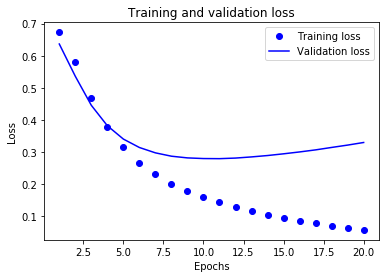

In [41]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

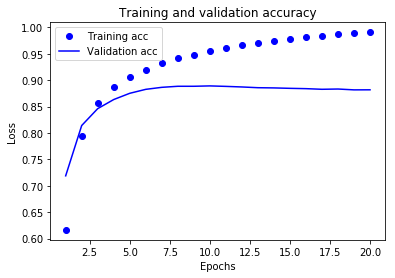

In [42]:
plt.clf()   # clear figure
acc_values = history.history['binary_accuracy']
val_acc_values = history.history['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
#To see that we are overfitting let's train our network from scratch on all train data

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 131us/step - loss: 0.4491 - acc: 0.8195
Epoch 2/4
25000/25000 [==============================] - 2s 95us/step - loss: 0.2527 - acc: 0.9106
Epoch 3/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.1960 - acc: 0.9289
Epoch 4/4
25000/25000 [==============================] - 5s 208us/step


In [44]:
results

[0.33416701210975647, 0.87004]

In [45]:
model.predict(X_test)

array([[0.12535246],
       [0.9997669 ],
       [0.51200074],
       ...,
       [0.0745592 ],
       [0.03799005],
       [0.47316495]], dtype=float32)